# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta

## Plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## NLP
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import  Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oxana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Read Cleaned Data

In [2]:
NY_reviews = pd.read_csv('./data/New_York_reviews_cleaned.csv', index_col=0)
NY_reviews.head()

,restaurant_name,rating_review,sample,title_review,review_preview,review_full,date,author_id
1,Lido,5,Positive,a regular treat,my wife and i have been eating dinner frequent...,my wife and i have been eating dinner frequent...,2020-10-08,UID_0
2,Lido,4,Positive,good neighborhood spot!,came with family for labor day weekend brunch ...,came with family for labor day weekend brunch ...,2020-09-08,UID_1
3,Lido,1,Negative,disappointing,food was mediocre at best. the lamb chops are...,food was mediocre at best. the lamb chops are ...,2020-02-17,UID_2
4,Lido,5,Positive,what a find in harlem,my co-workers were volunteering at a foodbank ...,my co-workers were volunteering at a foodbank ...,2019-11-25,UID_3
5,Lido,5,Positive,lunch,lido is an intimate boutique style restaurant....,lido is an intimate boutique style restaurant....,2019-11-23,UID_4


In [3]:
NY_reviews.dtypes

restaurant_name    object
rating_review       int64
sample             object
title_review       object
review_preview     object
review_full        object
date               object
author_id          object
dtype: object

In [4]:
NY_reviews['date'] = pd.to_datetime(NY_reviews['date'])

# Exploratory Data Analysis

## EDA 1 - Ratings

In [5]:
# Get a summary information of the numeric data
NY_reviews.describe()

,rating_review
count,510451.000000
mean,4.226999
std,1.002130
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<AxesSubplot:xlabel='rating_review', ylabel='count'>

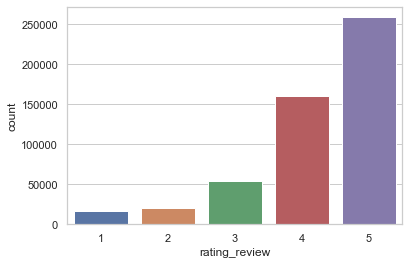

In [6]:
# Create a visualization to see how many reviews of each rating are in the DataFrame
sns.set_theme(style="whitegrid")
sns.countplot(x=NY_reviews['rating_review'])

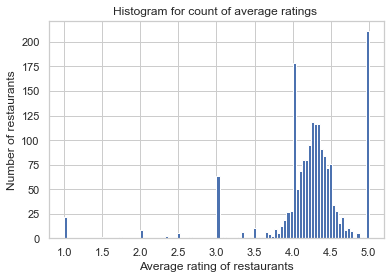

In [7]:
# Look at the average rating for each restaurant and create a histogram showing the distribution of the average rating
restaurant_average_rating = NY_reviews.groupby(['restaurant_name'])['rating_review'].mean()

plt.hist(restaurant_average_rating, bins=100)

plt.xlabel('Average rating of restaurants')
plt.ylabel('Number of restaurants')
plt.title('Histogram for count of average ratings ')

plt.show()

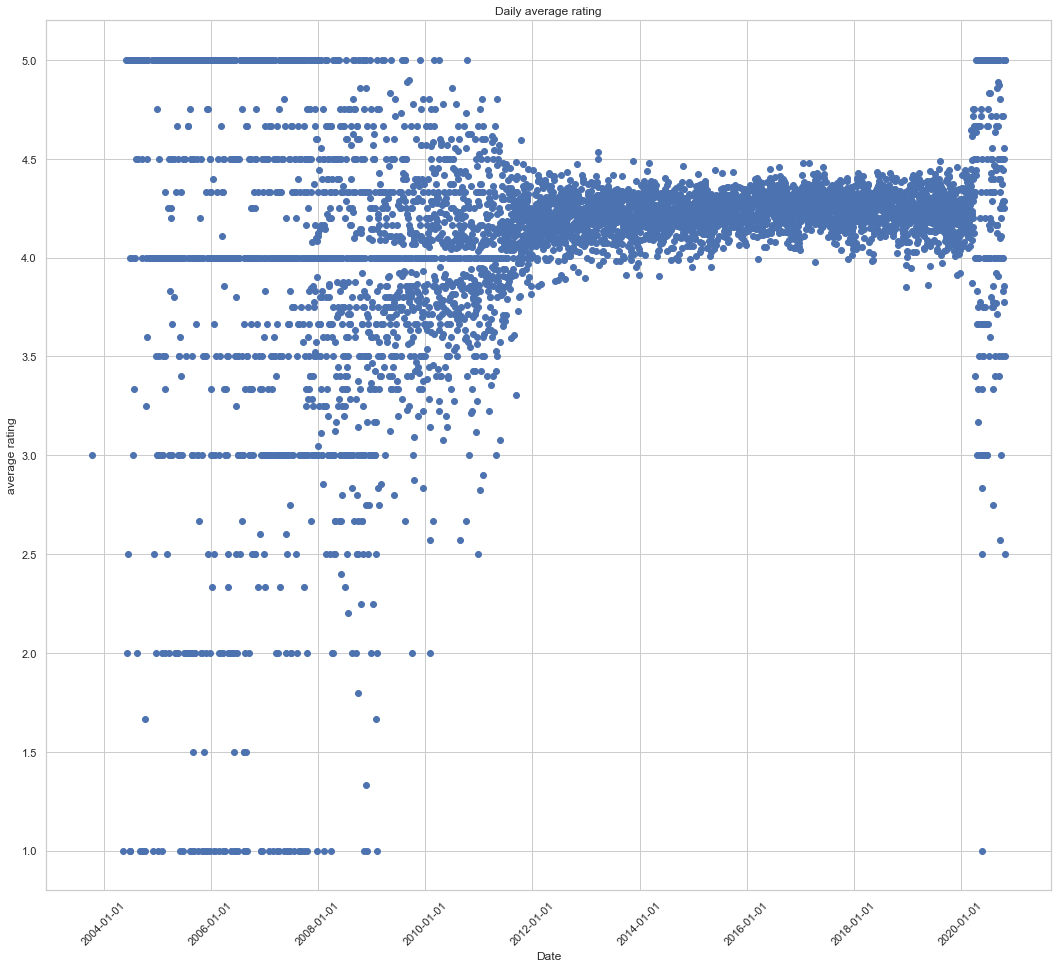

In [8]:
# average rating over time
date_average_rating = NY_reviews.groupby(['date'])['rating_review'].mean()

plt.figure(figsize=(18, 16))
plt.plot_date(date_average_rating.index, date_average_rating)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_tick_params(rotation=45)

plt.xlabel('Date')
plt.ylabel('average rating')
plt.title('Daily average rating')

plt.show()

From the graph above, we can observe


*   There is a steady trend since 2004 for the average rating to stay around 4.2.
*   There is a huge day by day variation of the daily average rating during the time period 2004-2008. We suspect it is because the number of users for the platform is still limited at that time.
*   Starting from the year 2008, we see that the huge variance gradually diminished, due to the increase of number of users.
*   Finally, the same pattern of large fluctuation occured again in 2020, in view of the fact that there was a sharp decrease of people dining out because of Covid-19.







## EDA 2 - About Authors

In [9]:
# counting unique authors
print("There are", len(pd.unique(NY_reviews['author_id'])), "unique authors.")

There are 249901 unique authors.


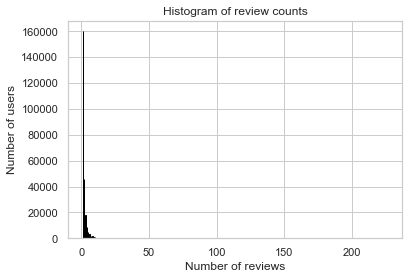

In [10]:
# Count the occurrences of each author, i.e. # reviews per author
value_counts = NY_reviews['author_id'].value_counts()

# Plot the histogram
plt.hist(value_counts, bins=1000, edgecolor='black')

# Set labels and title
plt.xlabel('Number of reviews')
plt.ylabel('Number of users')
plt.title('Histogram of review counts')

# Display the plot
plt.show()

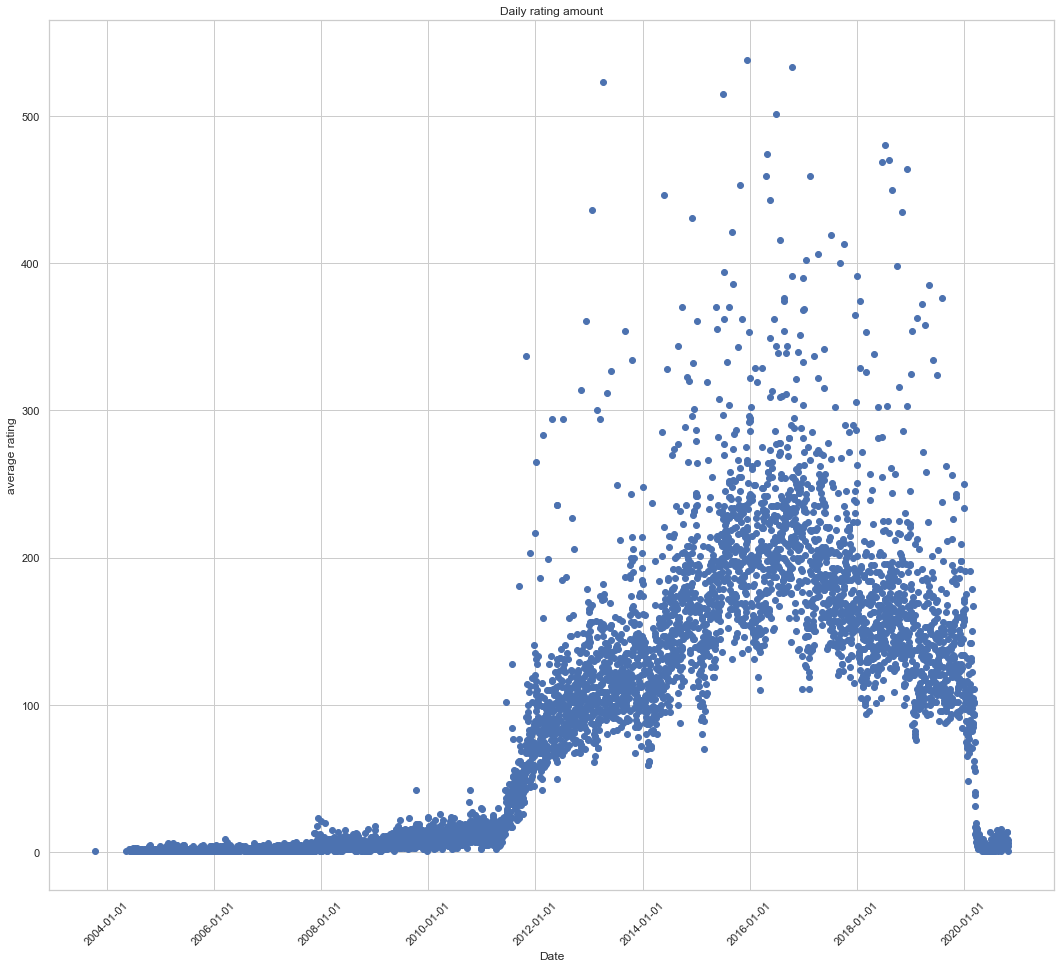

In [11]:
# number of ratings per day over time
date_rating_size = NY_reviews.groupby(['date']).size()

plt.figure(figsize=(18, 16))
plt.plot_date(date_rating_size.index, date_rating_size)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_tick_params(rotation=45)

plt.xlabel('Date')
plt.ylabel('average rating')
plt.title('Daily rating amount')

plt.show()

This chart shows the pattern of user activity over time, which confirmed our previous guess for the "Daily average rating" chart.

## EDA 3 - About Restaurants

In [12]:
# counting unique restaurants based on restaurant_name
print("There are", len(pd.unique(NY_reviews['restaurant_name'])), "unique restaurants.")

There are 1805 unique restaurants.


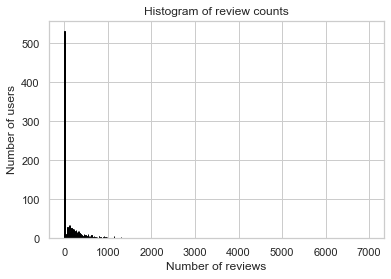

In [13]:
# count number of reviews for each restaurant
restaurant_value_counts = NY_reviews['restaurant_name'].value_counts()

# Plot the histogram
plt.hist(restaurant_value_counts, bins=1000, edgecolor='black')

# Set labels and title
plt.xlabel('Number of reviews')
plt.ylabel('Number of users')
plt.title('Histogram of review counts')

# Display the plot
plt.show()

In [14]:
# count number of reviews for each restaurant

# Group by the restaurant
grouped_restaurants = NY_reviews.groupby('restaurant_name')

# Count the number of reviews for each restaurant
rest_review_counts = grouped_restaurants.size().reset_index(name='review_count')

# Create a new DataFrame with restaurant names and review counts
rest_review_count_df = pd.DataFrame({'restaurant_name': rest_review_counts['restaurant_name'], 'review_count': rest_review_counts['review_count']})

# Sort the values
rest_review_count_df = rest_review_count_df.sort_values(by=['review_count'],ascending=False)

# Display the resulting DataFrame
print(rest_review_count_df)

                                restaurant_name  review_count
332   Carmine_s_Italian_Restaurant_Times_Square          6990
505                                      Eataly          3602
269                                    Buddakan          3473
1632                                  The_Smith          3455
522                      Ellen_s_Stardust_Diner          3362
...                                         ...           ...
1243                                 Pizza_King             1
359                     Chelsea_s_Breakfast_Bar             1
360                              Chennai_Garden             1
1230                                   Piccollo             1
1250                                Playa_Bowls             1

[1805 rows x 2 columns]


In [15]:
# Get a summary statistics of reviews number per restaurant
rest_review_count_df.describe()

,review_count
count,1805.000000
mean,282.798338
std,460.223488
min,1.000000
25%,2.000000
50%,148.000000
75%,326.000000
max,6990.000000


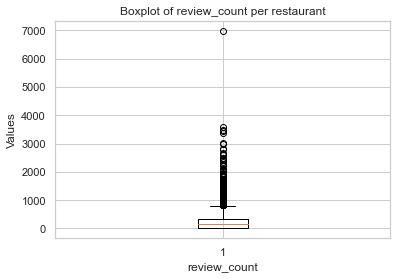

In [16]:
# Create a boxplot of number of reviews per restaurant
plt.boxplot(rest_review_count_df['review_count'])

# Customize the plot
plt.title("Boxplot of review_count per restaurant")
plt.xlabel("review_count")
plt.ylabel("Values")

# Display the plot
plt.show()

## EDA 4 - About Text Reviews

We will analyze the non stopwords that occurred most frequently in the review titles.

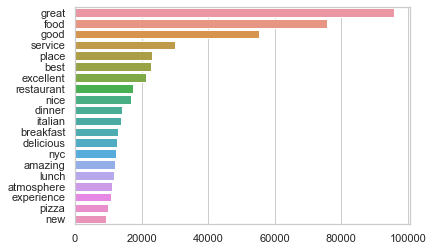

In [17]:
# define a function that plots the most common non-stopwords in some text
def nonstopwords_chart(text):
    stopword = set(stopwords.words('english'))
    new = (text.str.split()).values.tolist()
    word_list = []
    for line in new:
      for word in line:
        if word[-1] == ",":
          word = word[:-1]
        if (word not in stopword) and (word != "-"):
          word_list.append(word)

    most = Counter(word_list).most_common()
    words, count =[], []
    for word,num in most[:20]:
        words.append(word)
        count.append(num)

    sns.barplot(x=count,y=words)

# plot the most common non-stopwords for the review titles
nonstopwords_chart(NY_reviews['title_review'])

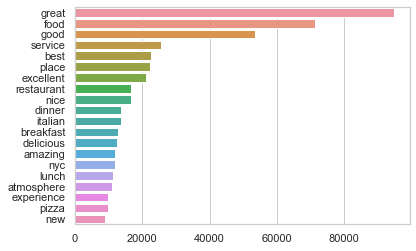

In [18]:
# plot the most common non-stopwords for the positive review titles
nonstopwords_chart(NY_reviews[NY_reviews['rating_review']>=3]['title_review'])

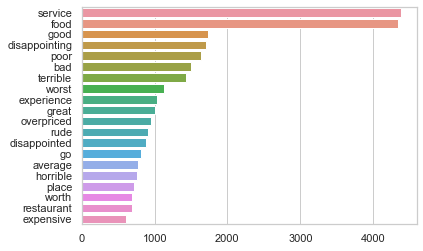

In [19]:
# plot the most common non-stopwords for the negative review titles
nonstopwords_chart(NY_reviews[NY_reviews['rating_review']<3]['title_review'])

Summarizing the three bar plots above, we see
*   The first plot and the second have a large overlap, which might be due to the large amount of positive reviews we have in the data set compared to the negative ones.
*   The last plot gives us some idea of what are the major reasons for a restaurant to get bad reviews: disappointing food, bad service, and high price.



## EDA 5 - Find restaurants that did not get reviews for last year or more

In [20]:
Restaurant_Groups=NY_reviews.groupby('restaurant_name')
# Get the last date in the dataset
last_date = NY_reviews['date'].max()

# Calculate the date one year before the last date
one_year_before_last_date = last_date - timedelta(days=365)

# Create a list to store tuples of restaurant names, review counts, and latest dates
restaurants_data = []
restaurant_counts = {}
latest_dates = {}
# Filter restaurants with a one-year gap from the latest date in their reviews
for name, group in Restaurant_Groups:
    latest_review_date = group['date'].max()
    if (last_date - latest_review_date).days >= 500:
        restaurant_counts[name] = len(group)
        latest_dates[name] = latest_review_date
        restaurants_data.append((name, len(group), latest_review_date))

# Sort the restaurants based on the latest review date
sorted_restaurants = sorted(restaurants_data, key=lambda x: x[2], reverse=True)

# Print the restaurants in order of the latest review date
for restaurant in sorted_restaurants:
    print("Restaurant:", restaurant[0])
    print("Number of Reviews:", restaurant[1])
    print("Latest Review Date:", restaurant[2])
    print()

print()

print('Total number of restaurants with the latest review older than 1 year is',len(sorted_restaurants))

Restaurant: Insomnia_Cookies
Number of Reviews: 6
Latest Review Date: 2019-06-13 00:00:00

Restaurant: Tbaar
Number of Reviews: 1
Latest Review Date: 2019-06-13 00:00:00

Restaurant: Sake_Bar_Hagi
Number of Reviews: 174
Latest Review Date: 2019-06-12 00:00:00

Restaurant: El_Encanto_de_lola_2
Number of Reviews: 1
Latest Review Date: 2019-06-09 00:00:00

Restaurant: 519
Number of Reviews: 4
Latest Review Date: 2019-06-07 00:00:00

Restaurant: Barbuto
Number of Reviews: 462
Latest Review Date: 2019-06-05 00:00:00

Restaurant: Bayard_s_Ale_House_East
Number of Reviews: 1
Latest Review Date: 2019-06-05 00:00:00

Restaurant: Playa_Bowls
Number of Reviews: 1
Latest Review Date: 2019-06-04 00:00:00

Restaurant: California_Pizza_Kitchen
Number of Reviews: 141
Latest Review Date: 2019-06-03 00:00:00

Restaurant: Valbella
Number of Reviews: 227
Latest Review Date: 2019-05-30 00:00:00

Restaurant: Landmarc_Restaurant
Number of Reviews: 667
Latest Review Date: 2019-05-23 00:00:00

Restaurant: Hoa_